In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#ml packages

##Estimators - 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

##Transformers - 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
df = pd.read_csv("emotions1.csv")

In [5]:
df.head()

,Unnamed: 0,Emotion,Text
0,1,joy,Sage Act upgrade list tommorow
1,2,sad,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
2,3,joy,eye true hazel eyeand brilliant Regular feat...
3,4,joy,ugh babe hugggzzz u babe naamazed nga ako e...
4,5,fear,Im expecting extremely important phonecall min...


In [6]:
df.tail()

,Unnamed: 0,Emotion,Text
27554,29808,sad,Today was such a bad day
27555,29809,sad,I feel sad
27556,29810,sad,I dont feel good
27557,29811,sad,Im sad
27558,29812,fear,stress


In [7]:
df.Emotion.value_counts()

joy          11066
sad           6741
fear          5421
anger         4307
greetings       16
farewell         8
Name: Emotion, dtype: int64

<AxesSubplot:xlabel='Emotion', ylabel='count'>

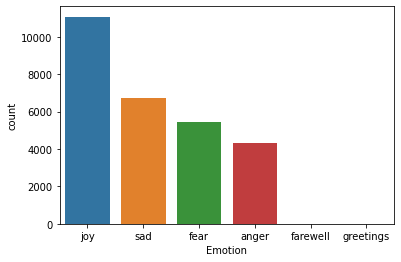

In [8]:
sns.countplot(x='Emotion', data=df)

In [9]:
#creating features
Xfeatures = df['Text'] #need to be vectorized
ylabels = df['Emotion'] #can remain as it is

In [10]:
#Vectorizer - converting text into numbers so that models can understand
cv = CountVectorizer()
# X = cv.fit_transform(Xfeatures)

In [11]:
X = cv.fit_transform(Xfeatures.values.astype('U'))

In [12]:
#get features by name
cv.get_feature_names()

['00',
 '000',
 '00am',
 '00pm',
 '01',
 '0330',
 '06',
 '073',
 '0798765',
 '08',
 '0800',
 '09',
 '099b8',
 '0l',
 '0o',
 '0w',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '100000yr',
 '10000th',
 '1000gifts',
 '1000s',
 '1000th',
 '100s',
 '100th',
 '101',
 '1010',
 '1015',
 '101quot',
 '102',
 '1021',
 '1022',
 '103',
 '1030',
 '1030am',
 '1030pm',
 '10373629',
 '104',
 '1040',
 '105',
 '106',
 '10am',
 '10ans',
 '10hrs',
 '10k',
 '10mins',
 '10pm',
 '10ritengono',
 '10th',
 '10x',
 '10year',
 '10years',
 '10yrolds',
 '11',
 '110',
 '1100pm',
 '1104',
 '110km',
 '111',
 '112',
 '1130',
 '115',
 '1162',
 '118',
 '11am',
 '11hour',
 '11months',
 '11pm',
 '11yr',
 '12',
 '120',
 '1200',
 '121',
 '12181',
 '122',
 '122511',
 '123',
 '1230',
 '125',
 '1250',
 '12521260',
 '128',
 '1295',
 '12days',
 '12hours',
 '12hr',
 '12hrstwitter',
 '12km',
 '12th',
 '12xbuild',
 '12xsmile',
 '12yearold',
 '13',
 '130',
 '1300',
 '130am',
 '135quot',
 '13joursdecole',
 '13th',
 '13yo',
 '14',
 '14

In [13]:
nv_model = MultinomialNB()
nv_model.fit(X, ylabels)

MultinomialNB()

In [14]:
ylabels.value_counts()

joy          11066
sad           6741
fear          5421
anger         4307
greetings       16
farewell         8
Name: Emotion, dtype: int64

In [15]:
def reply(emotion_string):
    if emotion_string == 'joy':
        print("Nice to know you feel happy")
    elif emotion_string == 'sad':
        print("Its okay to be sad sometimes")
    elif emotion_string == 'fear':
        print("It can be a little overwhelming at times")
    elif emotion_string == 'anger':
        print("If you feel angry, take a deep breath")
    elif emotion_string == 'greetings':
        print("Hello!")
    elif emotion_string == 'farewell':
        print("Bye!")
    else:
        print("Sorry I do not understand what you mean")

In [16]:
def predict_emotion_score(sample_text, model):
    myvect = cv.transform(sample_text).toarray()
    prediction = model.predict(myvect)
    pred_proba = model.predict_proba(myvect)
    pred_percentage_for_all = dict(zip(model.classes_, pred_proba[0]))
    print("Prediction: {}, Prediction Score: {}".format(prediction[0], np.max(pred_proba)))
    reply(prediction[0])
    return pred_percentage_for_all

In [19]:
predict_emotion_score(["bye"], nv_model)

Prediction: sad, Prediction Score: 0.515107775569284
Its okay to be sad sometimes


{'anger': 0.0177645535600585,
 'farewell': 0.00014536405997309565,
 'fear': 0.05622675533245849,
 'greetings': 0.00014528868452717505,
 'joy': 0.41061026279369855,
 'sad': 0.515107775569284}